In [1]:
import numpy as np
import matplotlib
import cv2
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook
data_dir='../data/image_output/'

In [3]:
def loadnpy(name):
    path=data_dir+name
    box3d=np.load(path)
#     print(box3d)
    print('{} shape = {}'.format(name,box3d.shape))
#     print(box3d[0,:,0])
    return box3d

In [4]:
def plotBox3d(box):
    print(box.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(box[:,0], box[:,1], box[:,2])
    plt.show()

In [5]:
def box3d_to_rgb_projections(boxes3d, Mt=None, Kt=None):

    if Mt is None: Mt = np.array(MATRIX_Mt)
    if Kt is None: Kt = np.array(MATRIX_Kt)

    num  = len(boxes3d)
    projections = np.zeros((num,8,2),  dtype=np.int32)
    for n in range(num):
        box3d = boxes3d[n]
        Ps = np.hstack(( box3d, np.ones((8,1))) )
        Qs = np.matmul(Ps,Mt)
        Qs = Qs[:,0:3]
        qs = np.matmul(Qs,Kt)
        zs = qs[:,2].reshape(8,1)
        qs = (qs/zs)
        projections[n] = qs[:,0:2]

    return projections

In [6]:
def draw_rgb_projections(image, projections, color=(255,0,255), thickness=2, darker=0.7):

    img = (image.copy()*darker).astype(np.uint8)
    num=len(projections)
    for n in range(num):
        qs = projections[n]
        for k in range(0,4):
            #http://docs.enthought.com/mayavi/mayavi/auto/mlab_helper_functions.html
            i,j=k,(k+1)%4
            cv2.line(img, (qs[i,0],qs[i,1]), (qs[j,0],qs[j,1]), color, thickness, cv2.LINE_AA)

            i,j=k+4,(k+1)%4 + 4
            cv2.line(img, (qs[i,0],qs[i,1]), (qs[j,0],qs[j,1]), color, thickness, cv2.LINE_AA)

            i,j=k,k+4
            cv2.line(img, (qs[i,0],qs[i,1]), (qs[j,0],qs[j,1]), color, thickness, cv2.LINE_AA)

    return img

In [7]:
def draw_rcnn_nms(rgb, boxes3d, probs, darker=1):

    img_rcnn_nms = (rgb.copy()*darker).astype(np.uint8)
    projections = box3d_to_rgb_projections(boxes3d)
    img_rcnn_nms = draw_rgb_projections(img_rcnn_nms,  projections, color=(255,0,255), thickness=1)

    return img_rcnn_nms

# Train modle

In [20]:
import trainer as t

OSError: [Errno 45] Operation not supported: '/home/ubuntu'

# batch_rois3d

In [8]:
boxs=loadnpy('batch_rois3d.npy')
len(boxs)

batch_rois3d.npy shape = (30, 8, 3)


30

# boxes3d

boxes3d.npy shape = (6, 8, 3)
(8, 3)


<IPython.core.display.Javascript object>


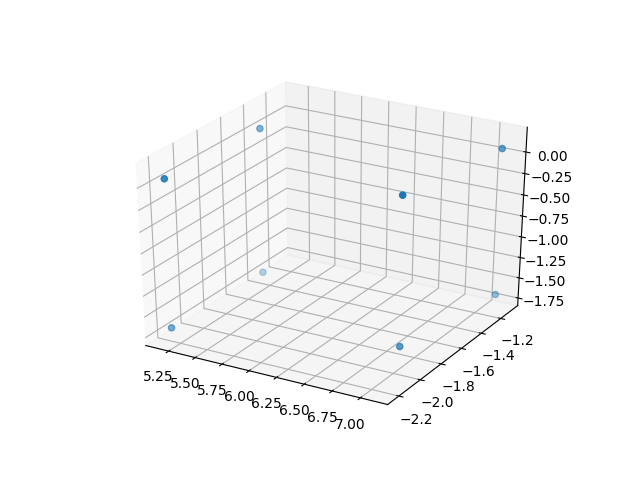

(8, 3)


<IPython.core.display.Javascript object>


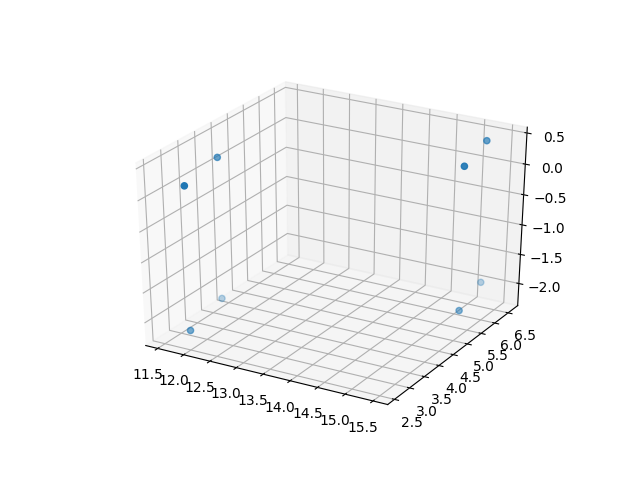

(8, 3)


<IPython.core.display.Javascript object>


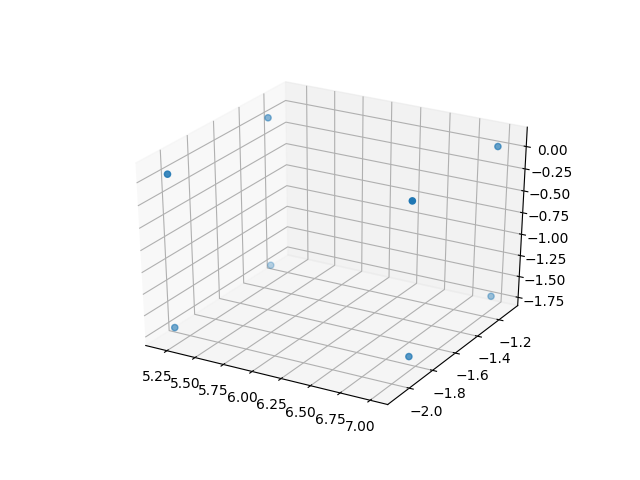

(8, 3)


<IPython.core.display.Javascript object>


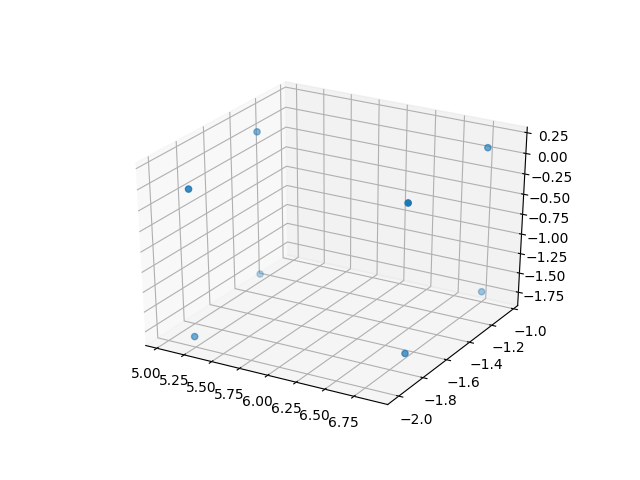

(8, 3)


<IPython.core.display.Javascript object>


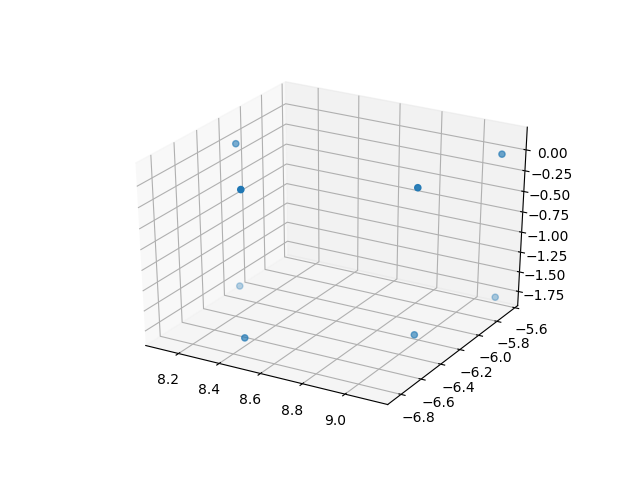

(8, 3)


<IPython.core.display.Javascript object>


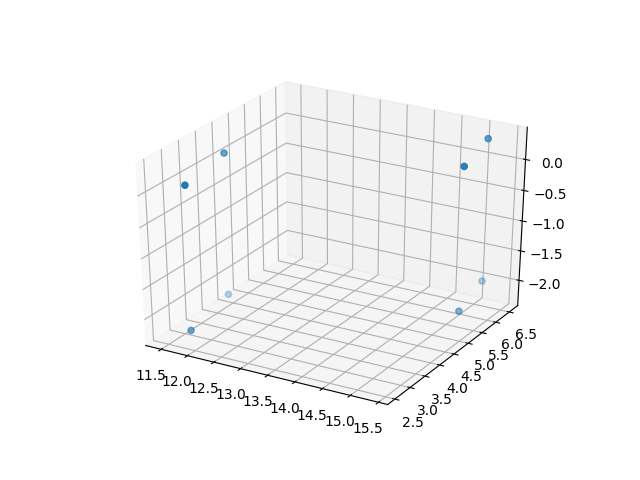

In [10]:
boxs_nms=loadnpy('boxes3d.npy')
len(boxs_nms)
for i in range(len(boxs_nms)):
    plotBox3d(boxs_nms[i])

# draw_rcnn_nms

In [11]:
rgb=loadnpy('rgb.npy')
boxes3d=loadnpy('boxes3d.npy')
probs=loadnpy('probs.npy')
batch_rois3d=loadnpy('batch_rois3d.npy')
batch_fuse_probs=loadnpy('batch_fuse_probs.npy')
#rgb camera
MATRIX_Mt = ([[  2.34773698e-04,   1.04494074e-02,   9.99945389e-01,  0.00000000e+00],
              [ -9.99944155e-01,   1.05653536e-02,   1.24365378e-04,  0.00000000e+00],
              [ -1.05634778e-02,  -9.99889574e-01,   1.04513030e-02,  0.00000000e+00],
              [  5.93721868e-02,  -7.51087914e-02,  -2.72132796e-01,  1.00000000e+00]])

MATRIX_Kt = ([[ 721.5377,    0.    ,    0.    ],
              [   0.    ,  721.5377,    0.    ],
              [ 609.5593,  172.854 ,    1.    ]])
print(batch_fuse_probs)

rgb.npy shape = (375, 1242, 3)
boxes3d.npy shape = (6, 8, 3)
probs.npy shape = (6,)
batch_rois3d.npy shape = (30, 8, 3)
batch_fuse_probs.npy shape = (30, 2)
[[  2.61358218e-04   9.99738634e-01]
 [  2.53186982e-09   1.00000000e+00]
 [  3.60471386e-05   9.99963999e-01]
 [  3.05876750e-02   9.69412327e-01]
 [  9.34161653e-05   9.99906540e-01]
 [  3.46535867e-09   1.00000000e+00]
 [  9.99999762e-01   2.75060728e-07]
 [  1.00000000e+00   6.77077394e-10]
 [  9.99996424e-01   3.63311210e-06]
 [  1.00000000e+00   2.39818849e-08]
 [  9.99997735e-01   2.26217026e-06]
 [  9.99873519e-01   1.26509796e-04]
 [  9.99999166e-01   8.83375890e-07]
 [  9.68772829e-01   3.12272049e-02]
 [  9.99988914e-01   1.10625606e-05]
 [  1.00000000e+00   6.74826361e-10]
 [  1.00000000e+00   6.08394446e-10]
 [  9.99999642e-01   3.05996736e-07]
 [  1.00000000e+00   4.96845065e-10]
 [  9.99996185e-01   3.81137716e-06]
 [  9.99998212e-01   1.84610508e-06]
 [  9.99995232e-01   4.82074802e-06]
 [  9.97956157e-01   2.043832

<IPython.core.display.Javascript object>


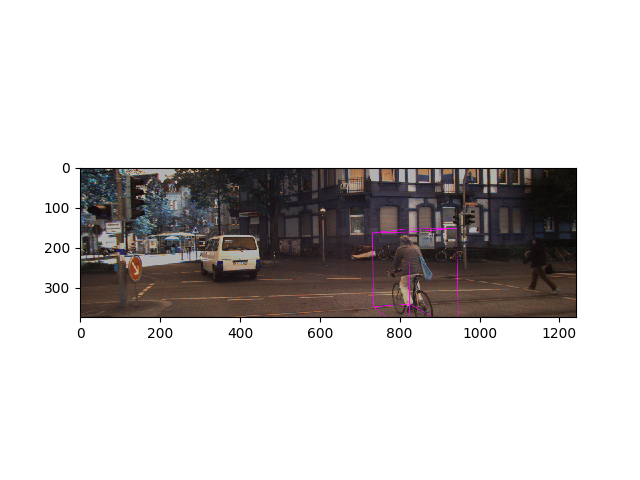

<IPython.core.display.Javascript object>


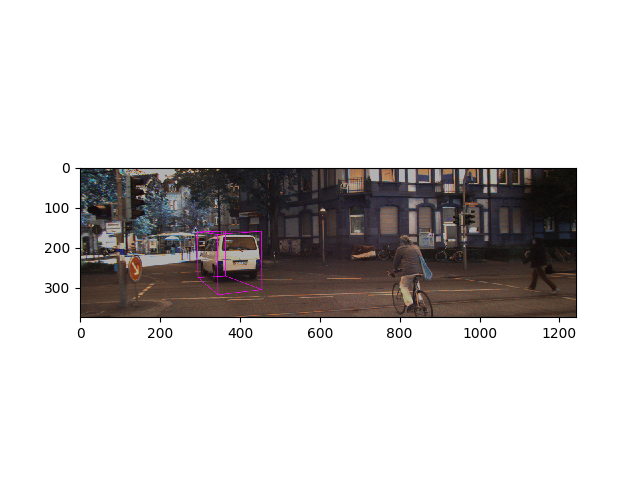

<IPython.core.display.Javascript object>


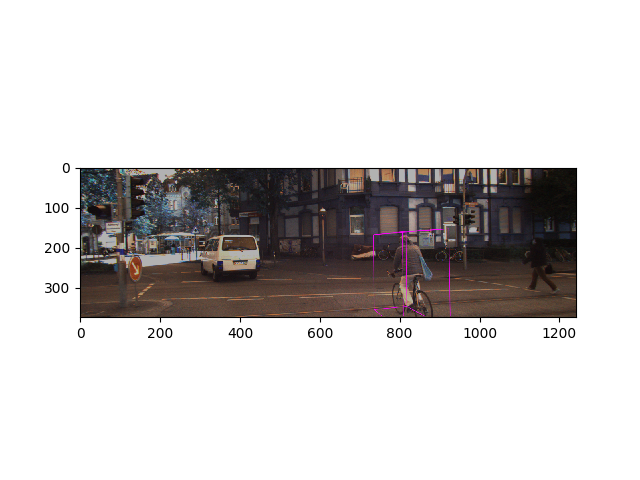

<IPython.core.display.Javascript object>


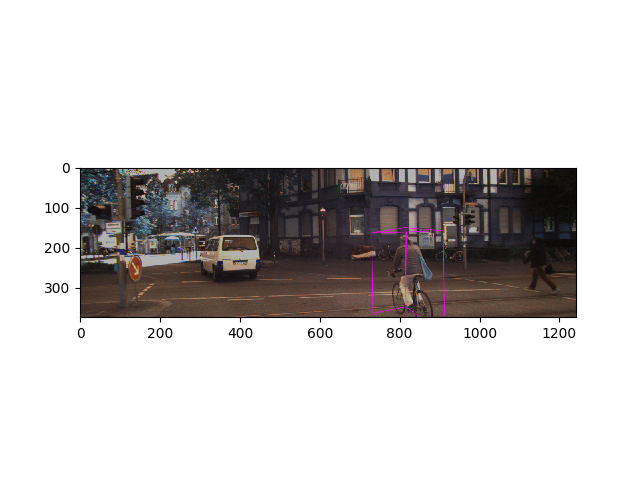

<IPython.core.display.Javascript object>


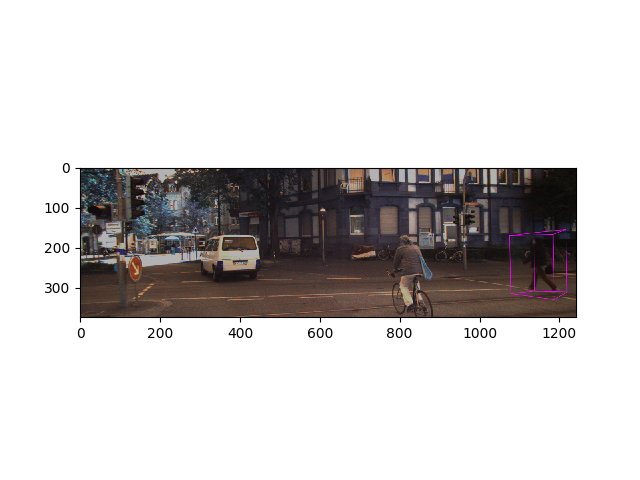

<IPython.core.display.Javascript object>


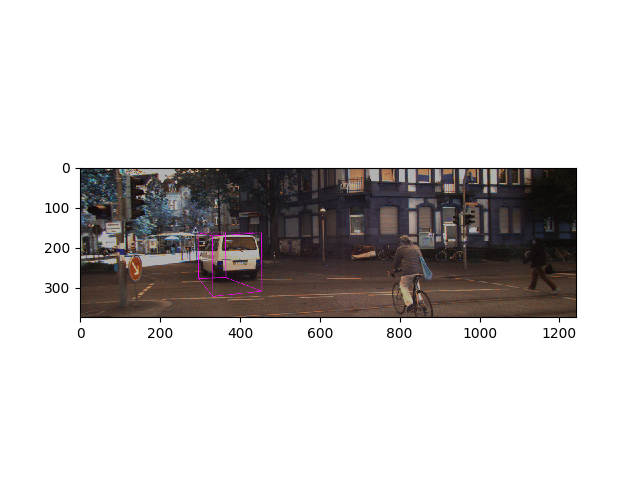

In [13]:
for i in range(len(boxes3d)):
    #img_rcnn_nms = draw_rcnn_nms(rgb, batch_rois3d[i:i+1], batch_fuse_probs[i:i+1])
    img_rcnn_nms = draw_rcnn_nms(rgb, boxes3d[i:i+1], probs[i:i+1])
    plt.figure()
    plt.imshow(img_rcnn_nms)

<IPython.core.display.Javascript object>


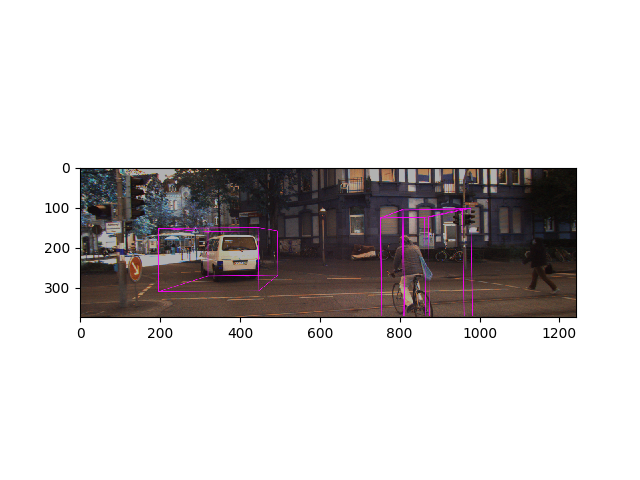

In [48]:
img_rcnn_nms = draw_rcnn_nms(rgb, batch_rois3d[0:3], batch_fuse_probs[0:3])
plt.figure()
plt.imshow(img_rcnn_nms)